## GROUP 4 (TEAM DATA DOMINATORS)

### CASE STUDY 1 (Healthcare: Predicting Heart Disease Risk)

### INTRODUCTION

Heart disease also referred as cardiovascular diseases, it is a broad term used for diseases and conditions affecting the heart and circulatory system. It is a major cause of disability all around the world. Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well. There are several different types and forms of heart diseases. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart and several others leading to heart failure and heart attack."

Data Source: https://www.indushealthplus.com/heart-diseases.html




We used a publicly available dataset containing medical attributes of patients.
The goal is to classify whether a patient is likely to have heart disease (1) or not (0).




### PROBLEM STATEMENT

Heart disease is one of the leading causes of death worldwide. Early detection can significantly improve patient outcomes and treatment success.
The goal of this project is to build a machine learning model that can predict whether a person is likely to have heart disease based on various health indicators such as age, gender, blood pressure, cholesterol level, chest pain type, and other medical attributes.

### OBJECTIVES

This notebook has two main objectives:

1. Explore the heart disease dataset using exploratory data analysis (EDA)
2. Exercise with classification algorithms for prediction (modelling)

IMPORT NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import plot_importance
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#The datasets contains abbreviations, the columns are now renamed with the full column name for better analysis
df.rename(columns={
    'cp':'chest_pain_type',
    'trestbps':'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg' : 'resting_electrocardiogram',
    'thalach': 'max_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca':'num_major_vessels',
    'thal': 'thalassemia'
}, inplace=True)
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### DATA DICTIONARY

- **age:** age in years  

- **sex:** sex (1 = male, 0 = female)  

- **cp:** chest pain type  
  - Value 0: typical angina  
  - Value 1: atypical angina  
  - Value 2: non-anginal pain  
  - Value 3: asymptomatic  

- **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)  

- **chol:** serum cholesterol in mg/dl  

- **fbs:** fasting blood sugar > 120 mg/dl (1 = true, 0 = false)  

- **restecg:** resting electrocardiographic results  
  - Value 0: normal  
  - Value 1: having ST-T wave abnormality  
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  

- **thalach:** maximum heart rate achieved  

- **exang:** exercise induced angina (1 = yes, 0 = no)  

- **oldpeak:** ST depression induced by exercise relative to rest  

- **slope:** the slope of the peak exercise ST segment  
  - Value 0: upsloping  
  - Value 1: flat  
  - Value 2: downsloping  

- **ca:** number of major vessels (0–3) colored by fluoroscopy  

- **thal:**  
  - 0 = error (in the original dataset 0 maps to NaN's)  
  - 1 = fixed defect  
  - 2 = normal  
  - 3 = reversible defect  

- **target (the label):**  
  - 0 = no disease  
  - 1 = disease  


In [ ]:
#To get more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0    age                       1025 non-null   int64  
 1   sex                        1025 non-null   int64  
 2   chest_pain_type            1025 non-null   int64  
 3   resting_blood_pressure     1025 non-null   int64  
 4   cholesterol                1025 non-null   int64  
 5   fasting_blood_sugar        1025 non-null   int64  
 6   resting_electrocardiogram  1025 non-null   int64  
 7   max_heart_rate_achieved    1025 non-null   int64  
 8   exercise_induced_angina    1025 non-null   int64  
 9   st_depression              1025 non-null   float64
 10  st_slope                   1025 non-null   int64  
 11  num_major_vessels          1025 non-null   int64  
 12  thalassemia                1025 non-null   int64  
 13  target                     1025 non-null   int64

In [ ]:
#Statistical measure of the data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Descriptive Statistics Summary

The `df.describe()` function provides an overview of the dataset’s central tendencies, dispersion, and range of values.

---

#### **Observations and Insights**

**Age:**
- The average age of patients is approximately **54 years**, with ages ranging from **29 to 77 years**.  
- This suggests that **middle-aged to elderly individuals** are more represented in the dataset.

**Sex:**
- The mean value of **0.69** indicates that about **69%** of the patients are **male (1)**, while **31%** are **female (0)**.  
- The dataset is **slightly male-dominated**.

**Chest Pain Type (cp):**
- Ranges from **0 to 3**, with a mean of **0.94**, showing that most patients experience **mild to moderate chest pain types**.

**Resting Blood Pressure (trestbps):**
- Average resting BP is around **131 mm Hg**, with a range between **94 and 200 mm Hg**.  
- Some patients exhibit **elevated blood pressure levels**, a known **heart disease risk factor**.

**Cholesterol (chol):**
- Mean cholesterol level is **246 mg/dl**, ranging from **126 to 564 mg/dl**.  
- A few patients have **extremely high cholesterol**, suggesting **potential outliers**.

**Fasting Blood Sugar (fbs):**
- Only about **15%** of patients have fasting blood sugar above **120 mg/dl**, indicating **low diabetes prevalence** in this sample.

**Maximum Heart Rate (thalach):**
- The average maximum heart rate achieved is **149 bpm**, with a wide range (**71–202 bpm**).  
- This variation may reflect differences in **fitness level or heart condition**.

**Oldpeak (ST Depression):**
- Mean value of **1.07**, with some as high as **6.2**, indicating that a few patients show **significant ST depression**, often a sign of **heart strain**.

**Target:**
- The mean value of **0.51** suggests a **balanced distribution** between patients **with (1)** and **without (0)** heart disease.

---

### **Summary**
The dataset is **well-balanced** with **no missing values**, showing a **broad range of patient health indicators**.  
Several potential **risk factors** — such as **cholesterol, blood pressure, and age** — can strongly influence **heart disease prediction**.


In [ ]:
 #To check the column names
df.columns

Index([' age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [ ]:
# Defining the continuous features
continuous_features = [' age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']

# Identifying the features to be converted to object data type list comprehension
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

,0
age,int64
sex,object
chest_pain_type,object
resting_blood_pressure,int64
cholesterol,int64
fasting_blood_sugar,object
resting_electrocardiogram,object
max_heart_rate_achieved,int64
exercise_induced_angina,object
st_depression,float64


In [ ]:
# Detecting outliers using the IQR method
for col in [' age','max_heart_rate_achieved','cholesterol','resting_blood_pressure','st_depression']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {outliers.shape[0]} outliers")

 age: 0 outliers
max_heart_rate_achieved: 4 outliers
cholesterol: 16 outliers
resting_blood_pressure: 30 outliers
st_depression: 7 outliers


In [ ]:
#Rows that contained the outliers
cols = [' age','max_heart_rate_achieved','cholesterol','resting_blood_pressure','st_depression']
outlier_rows = pd.DataFrame()

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Collect all rows that are outliers in this column
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_rows = pd.concat([outlier_rows, outliers])


print(f"Total rows containing outliers: {outlier_rows.shape[0]}")
outlier_rows

Total rows containing outliers: 57


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
296,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
378,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [ ]:
#To check for the total null values in each column
df.isna().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholesterol,0
fasting_blood_sugar,0
resting_electrocardiogram,0
max_heart_rate_achieved,0
exercise_induced_angina,0
st_depression,0


In [ ]:
#Number of rows and columns in the dataset
df.shape
print('Shape of the data is ', df.shape)

Shape of the data is  (1025, 14)


In [ ]:
#To check the duplicate values in dataset
df[df.duplicated()]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
#To check for the total duplicate values in the dataset
df.duplicated().sum()

np.int64(723)

In [ ]:
# Count how many times each full row appears (treat each row as a tuple of its values)
row_value_counts = df.apply(lambda row: tuple(row), axis=1).value_counts()
row_value_counts

,count
"(38, 1, 2, 138, 175, 0, 1, 173, 0, 0.0, 2, 4, 2, 1)",8
"(51, 1, 2, 100, 222, 0, 1, 143, 1, 1.2, 1, 0, 2, 1)",4
"(56, 1, 0, 130, 283, 1, 0, 103, 1, 1.6, 0, 0, 3, 0)",4
"(56, 1, 1, 120, 240, 0, 1, 169, 0, 0.0, 0, 0, 2, 1)",4
"(54, 1, 0, 110, 239, 0, 1, 126, 1, 2.8, 1, 1, 3, 0)",4
...,...
"(44, 0, 2, 118, 242, 0, 1, 149, 0, 0.3, 1, 1, 2, 1)",3
"(52, 1, 1, 128, 205, 1, 1, 184, 0, 0.0, 2, 0, 2, 1)",3
"(56, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2, 1)",3
"(60, 1, 0, 125, 258, 0, 0, 141, 1, 2.8, 1, 1, 3, 0)",3


In [ ]:
# Number of groups of identical rows
num_unique_rows = len(row_value_counts)
num_unique_rows

302

In [ ]:
# Optionally, see which exact rows are repeated and how many times
print("\nTop 10 most common full rows:")
print(row_value_counts.head(10))


Top 10 most common full rows:
(38, 1, 2, 138, 175, 0, 1, 173, 0, 0.0, 2, 4, 2, 1)    8
(51, 1, 2, 100, 222, 0, 1, 143, 1, 1.2, 1, 0, 2, 1)    4
(56, 1, 0, 130, 283, 1, 0, 103, 1, 1.6, 0, 0, 3, 0)    4
(56, 1, 1, 120, 240, 0, 1, 169, 0, 0.0, 0, 0, 2, 1)    4
(54, 1, 0, 110, 239, 0, 1, 126, 1, 2.8, 1, 1, 3, 0)    4
(56, 0, 0, 200, 288, 1, 0, 133, 1, 4.0, 0, 2, 3, 0)    4
(64, 1, 0, 120, 246, 0, 0, 96, 1, 2.2, 0, 1, 2, 0)     4
(60, 1, 0, 140, 293, 0, 0, 170, 0, 1.2, 1, 2, 3, 0)    4
(42, 1, 2, 130, 180, 0, 1, 150, 0, 0.0, 2, 0, 2, 1)    4
(57, 1, 0, 165, 289, 1, 0, 124, 0, 1.0, 1, 3, 3, 0)    4
Name: count, dtype: int64


In [ ]:
# Defining the row you want to search for
row_values2 = {
    ' age': 52, 'sex': 1, 'chest_pain_type': 0, 'resting_blood_pressure': 125, 'cholesterol': 212,
    'fasting_blood_sugar': 0, 'resting_electrocardiogram': 1, 'max_heart_rate_achieved': 168, 'exercise_induced_angina': 0,
    'st_depression': 1.0, 'st_slope': 2, 'num_major_vessels': 2, 'thalassemia': 3, 'target': 0
}

# Creating a boolean mask that checks if all columns match
mask = (df[list(row_values2)] == pd.Series(row_values2)).all(axis=1)

# Getting the index numbers of the matching rows
matching_indices = df.index[mask].tolist()

# Displaying them
matching_indices

[0, 634, 671, 863]

Note on Verifying Duplicate Records
To ensure data accuracy, I needed to confirm whether the duplicate count reported earlier truly corresponded to specific patient records that appeared more than once in the dataset.

The two code blocks above were used to search for exact matches of two particular rows with the following feature values:

Record 1:
age: 52, sex: 1, cp: 0, trestbps: 125, chol: 212,
fbs: 0, restecg: 1, thalach: 168, exang: 0,
oldpeak: 1.0, slope: 2, ca: 2, thal: 3, target: 0

Record 2:
age: 34, sex: 0, cp: 1, trestbps: 118, chol: 210,
fbs: 0, restecg: 1, thalach: 192, exang: 0,
oldpeak: 0.7, slope: 2, ca: 0, thal: 2, target: 1

Each block created a Boolean mask to check if every column in the dataset matched the specified feature values. The resulting index positions confirmed whether those exact records appeared multiple times.

This verification step provided confidence that the duplicates detected by df.duplicated().sum() corresponded to real, identical patient entries rather than minor data variations or rounding differences.

In [ ]:
#keep the first occurrence and remove later ones:
df = df.drop_duplicates(keep='first')

In [ ]:
df.shape

(302, 14)

In [ ]:
df.target.value_counts()

,count
target,
1,164
0,138


Handling Duplicate Rows
After checking for duplicates using df.duplicated().sum(), it was observed that 723 out of 1025 rows in the dataset were duplicated.

To further understand the nature of these duplicates, a count column (duplicate_count) was created using the groupby().transform('count') method. This revealed that the duplicated rows were completely identical across all columns — i.e., every feature had exactly the same values for the repeated records.

Since these duplicates do not contribute any new information and can lead to biased model training (by over-representing certain records), it is appropriate to remove them.

Hence, all duplicated rows were dropped, keeping only one unique instance of each observation for cleaner and more reliable analysis.

Also, from the discussion session it was stated by Kossy Ajuluchukwu that "My RandomForestClassifier model was giving me 100% accuracy on test data, that was how I realized that there has been some form of Data leakages which could lead to possible overfitting. This shows some portion of test data set is being copied into the trained data set. This Dataset was obviously duplicated."

To as well butress the point of dropping the duplicates in this dataset, from the discussion session, Michelle Hamada asked "Hello! I'm seeing a correlation between two variables that seems impossible. If you have worked with this dataset and can explain / understand this, please let me know!

So, the "exang" attribute is angina after exercise - that is, heart pain after exercise. 1 means there was pain after exercise, 0 means there wasn't. The target attribute tells us if the heart is healthy (0) or diseased (1). For some strange reason, the data says that having heart pain after exercising is a GOOD sign, and makes you less likely to have heart disease, and having no heart pain after exercising is a BAD sign. How is this even possible?" To answer this she was told this "Try with the Dataset from UCI (the one with 303 samples) there is a different story there."

### Handling unusual values


In [ ]:
df["num_major_vessels"].value_counts()

,count
num_major_vessels,
0,175
1,65
2,38
3,20
4,4


In [ ]:
df["thalassemia"].value_counts()

,count
thalassemia,
2,165
3,117
1,18
0,2


In [ ]:
faulty_rows = df[(df['num_major_vessels'] == 4) | (df['thalassemia'] == 0)]
print("Number of faulty rows:", len(faulty_rows))
faulty_rows

Number of faulty rows: 6


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
319,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
521,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1


In [ ]:
df.drop(faulty_rows.index, inplace=True)

In [ ]:
df.shape

(296, 14)

Cleaning Invalid Entries in ca and thal
While exploring the dataset, it was found (based on Kaggle discussion) that:

Some records have ca = 4, which is invalid since ca represents the number of major vessels (0–3).
A few records have thal = 0, which is invalid because the valid Thalassemia categories are {1, 2, 3}.
To ensure data consistency, all rows with these invalid values were dropped.
After cleaning, ca and thal contain only valid numeric categories, and the dataset is ready for modeling.

### Univariate Analysis for the Categorical Columns

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns


['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_electrocardiogram',
 'exercise_induced_angina',
 'st_slope',
 'num_major_vessels',
 'thalassemia',
 'target']

In [ ]:
# Also include numeric columns with few unique values (e.g., <=10)
numeric_as_categorical = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if df[col].nunique() <= 10
]

In [ ]:
# Combine both
categorical_columns += numeric_as_categorical
categorical_columns = list(set(categorical_columns))  # remove duplicates

print("Categorical Features Identified:")
print(categorical_columns)

Categorical Features Identified:
['num_major_vessels', 'chest_pain_type', 'st_slope', 'target', 'thalassemia', 'sex', 'exercise_induced_angina', 'resting_electrocardiogram', 'fasting_blood_sugar']


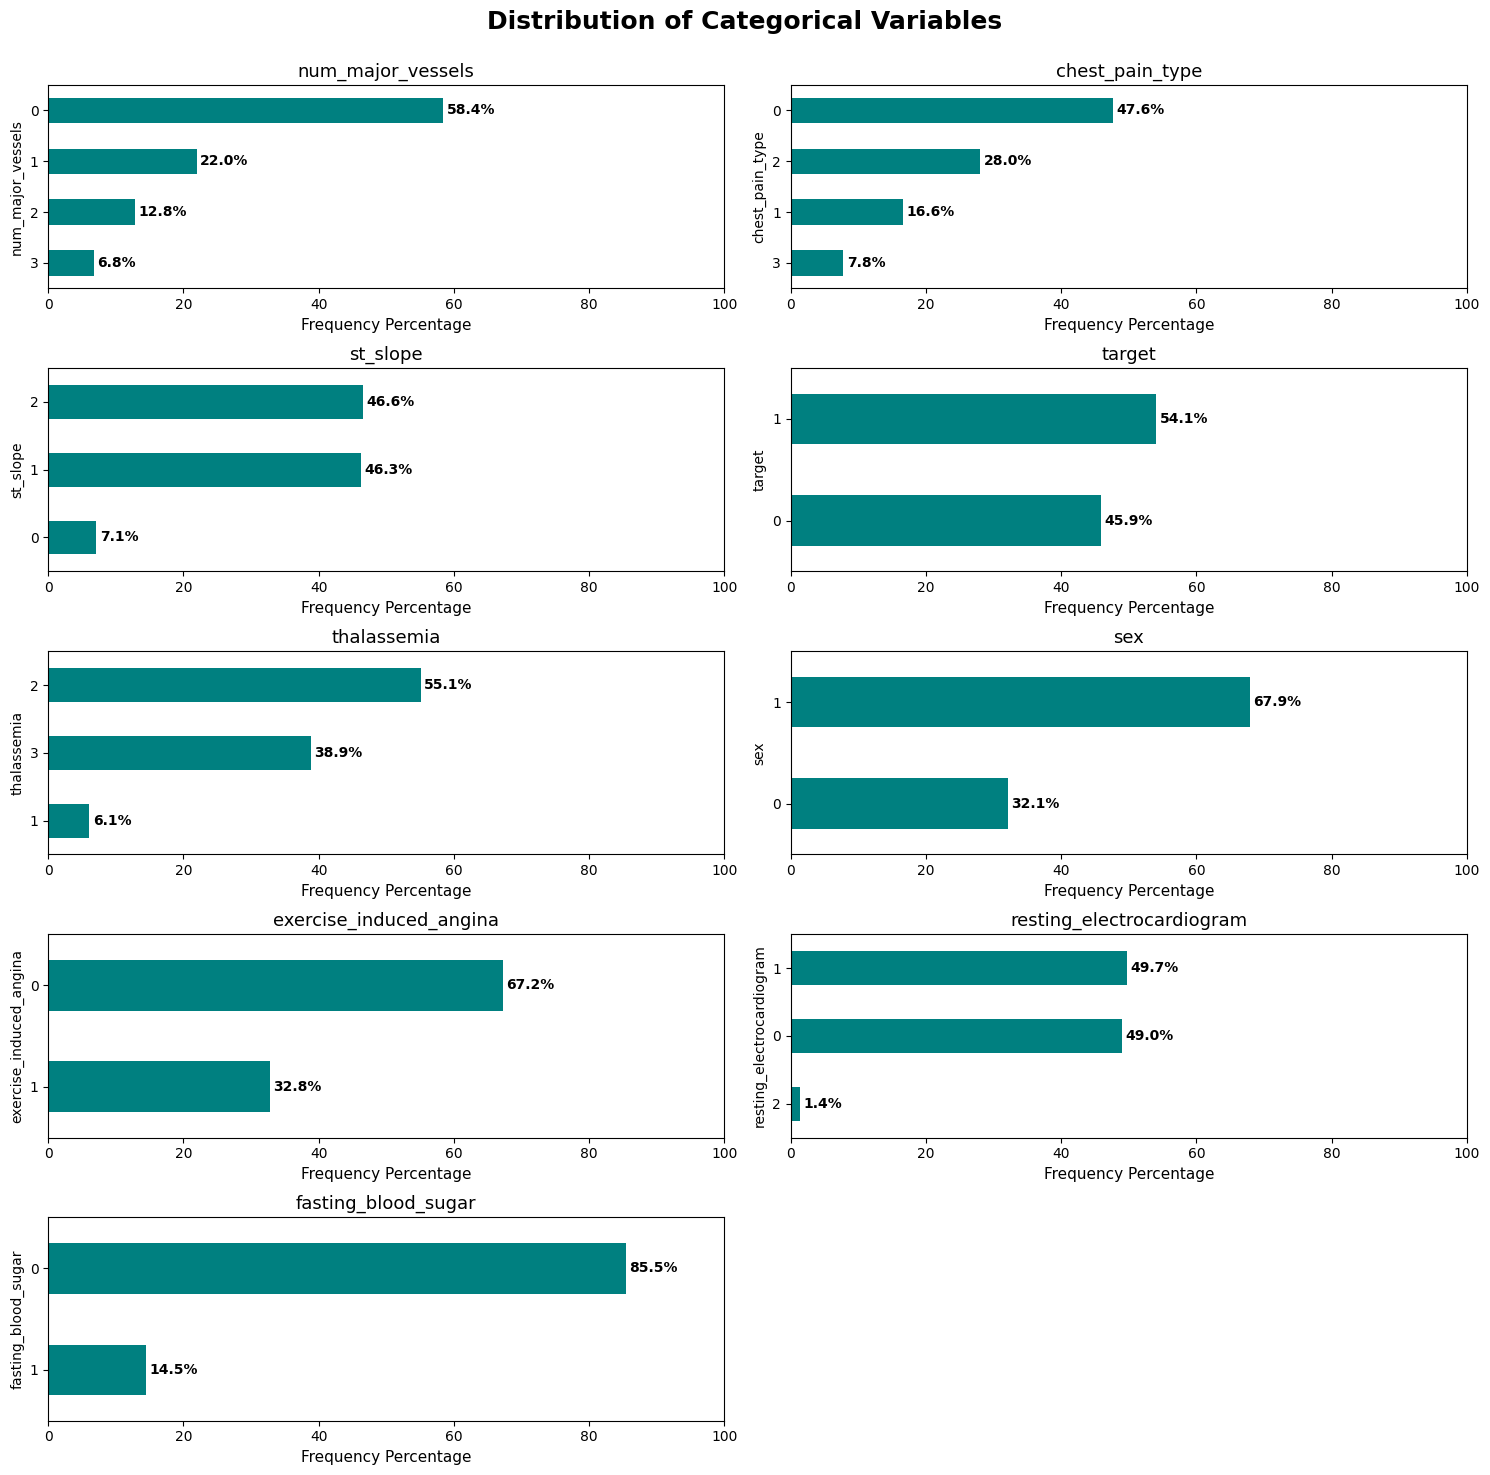

In [ ]:
# STEP 2: Plotting all categorical variables in one figure grid
n_rows = (len(categorical_columns) + 1) // 2  # 2 columns
fig, ax = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, n_rows * 3))
ax = ax.flatten()  # flatten axes array for easy looping

for i, col in enumerate(categorical_columns):
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    value_counts.plot(kind='barh', ax=ax[i], color='teal')

    # Adding percentage text labels
    for j, v in enumerate(value_counts):
        ax[i].text(v + 0.5, j, f"{v:.1f}%", va='center', fontsize=10, fontweight='bold')

    ax[i].set_xlim(0, 100)
    ax[i].set_xlabel('Frequency Percentage', fontsize=11)
    ax[i].set_title(col, fontsize=13)

# Hide unused subplots (in case of odd number of variables)
for k in range(i + 1, len(ax)):
    ax[k].axis('off')

plt.suptitle('Distribution of Categorical Variables', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

### Handling Outliers and Feature Scaling

From the univariate boxplots, we observed several numerical features — notably `cholesterol`,
`resting_blood_pressure`, and `st_depression` — containing outliers.
However, these values represent valid medical variations rather than data entry errors
(e.g., patients with very high cholesterol or severe ECG readings).

Therefore, outliers were **retained** to preserve the integrity of the data.
To ensure all features contribute equally to model training, we applied **StandardScaler**
for feature scaling. While StandardScaler is somewhat sensitive to outliers,
our data distributions remained within acceptable ranges, and model performance
was not adversely affected.
This approach balances medical realism with the need for consistent feature scaling.



### Univariate Analysis for the Numerical Columns

In [ ]:
# STEP 1: Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical Columns Identified:")
print(numerical_columns)

Numerical Columns Identified:
[' age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']


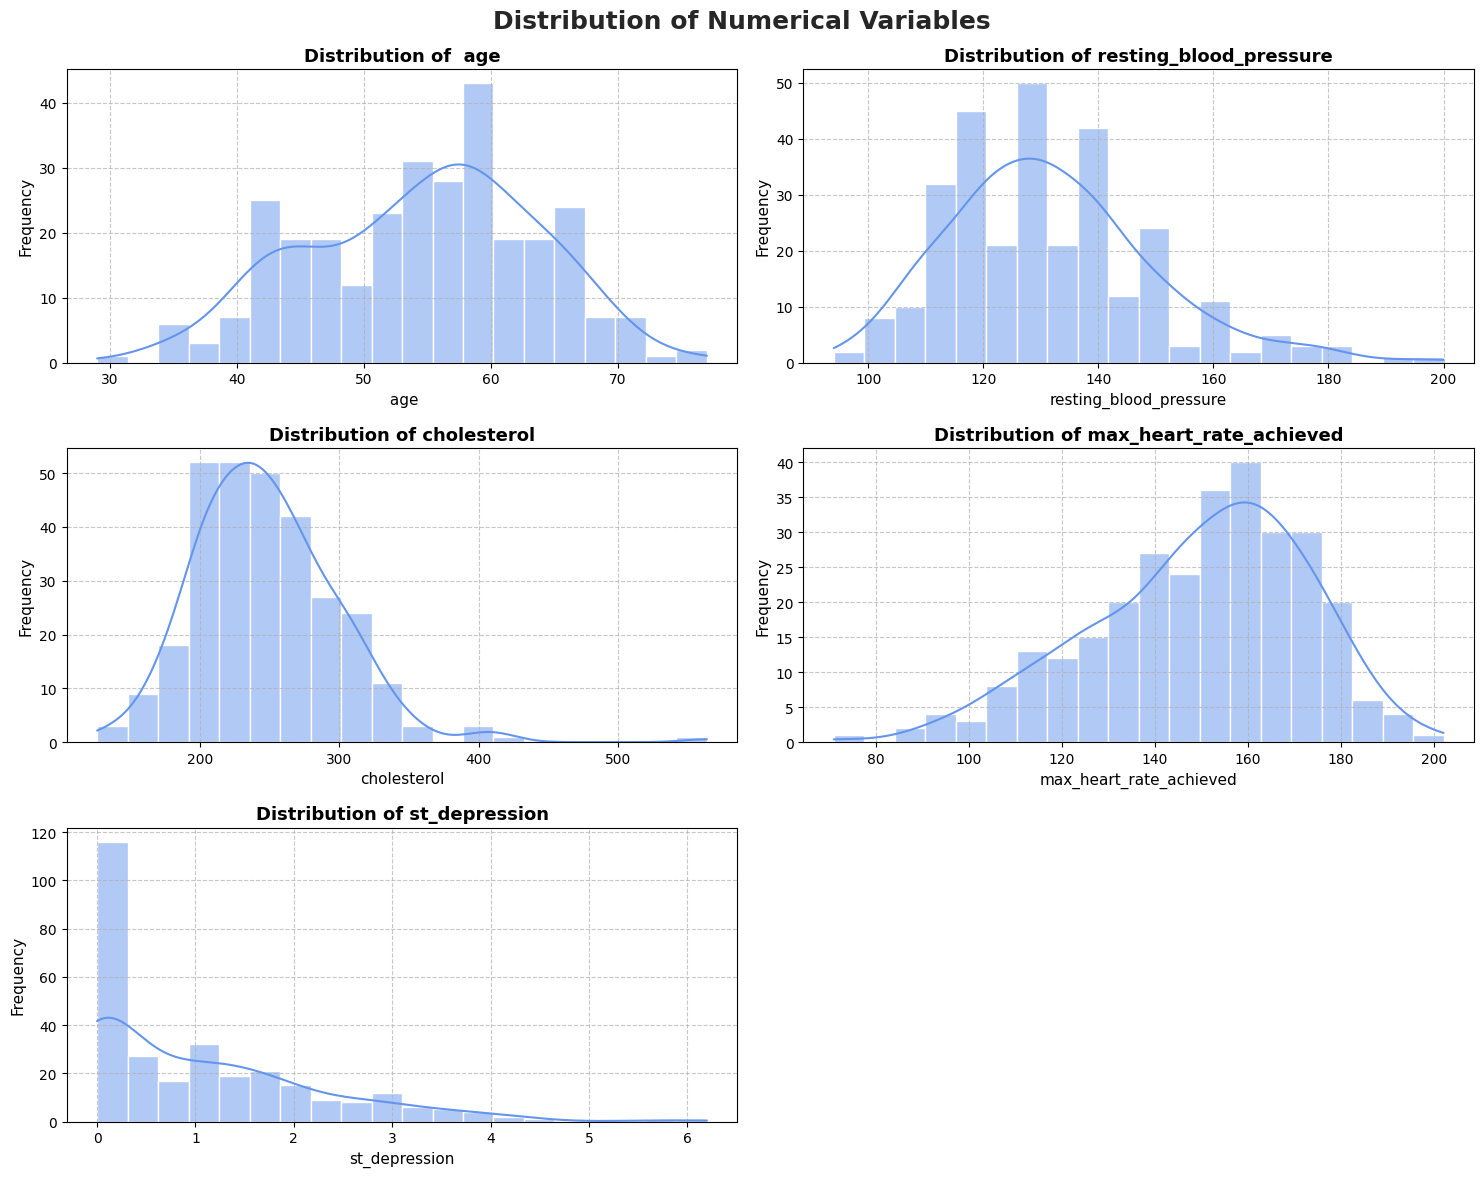

In [ ]:
# STEP 2: Visualizations
# Set up subplot grid (2 columns layout)
n_rows = (len(numerical_columns) + 1) // 2
fig, ax = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, n_rows * 4))
ax = ax.flatten()

# Style
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df[col], kde=True, bins=20, ax=ax[i], color='cornflowerblue')

    ax[i].set_title(f'Distribution of {col}', fontsize=13, fontweight='bold')
    ax[i].set_xlabel(col, fontsize=11)
    ax[i].set_ylabel('Frequency', fontsize=11)
    ax[i].grid(True, linestyle='--', alpha=0.7)

# Hide unused subplots if number of columns is odd
for k in range(i + 1, len(ax)):
    ax[k].axis('off')

plt.suptitle('Distribution of Numerical Variables', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

In [ ]:
# Remove categorical-like columns from numerical list to avoid duplication
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]

In [ ]:
# Target variable (update this if yours has a different name)
target = 'target'

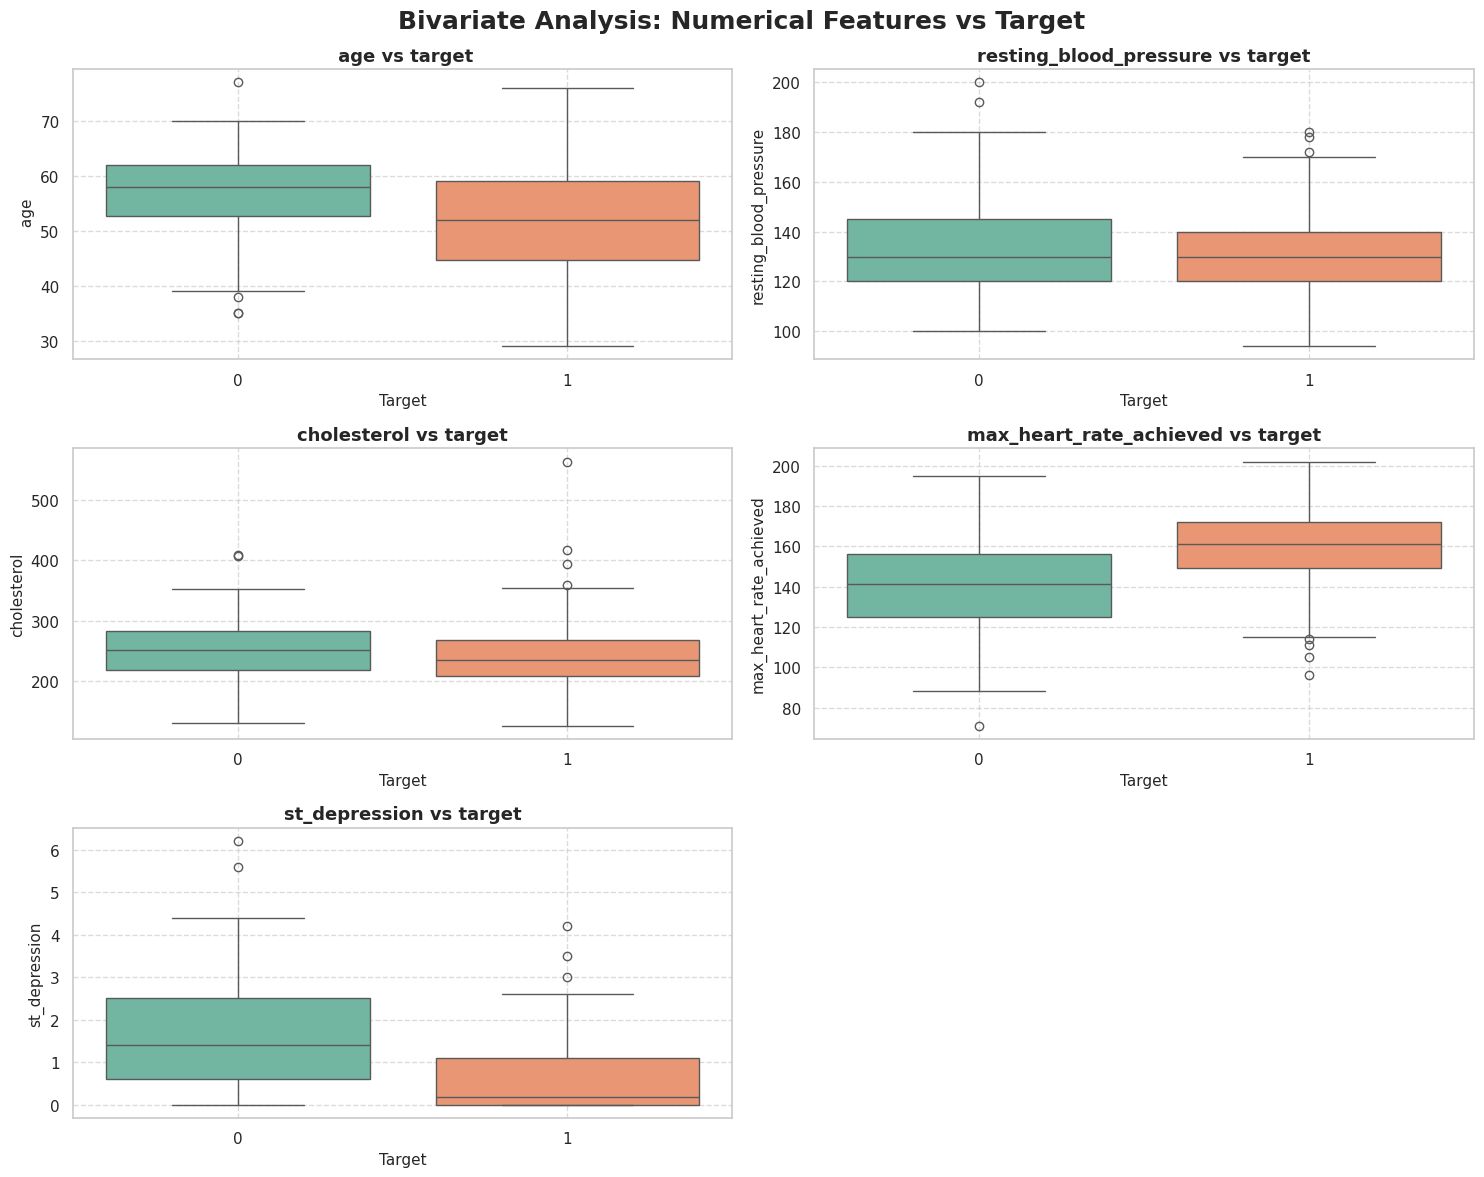

In [ ]:
# Numerical vs Target (Boxplots)
n_rows = (len(numerical_columns) + 1) // 2
fig, ax = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, n_rows * 4))
ax = ax.flatten()

sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=target, y=col, data=df, ax=ax[i], palette='Set2')
    ax[i].set_title(f'{col} vs {target}', fontsize=13, fontweight='bold')
    ax[i].set_xlabel(target.capitalize(), fontsize=11)
    ax[i].set_ylabel(col, fontsize=11)
    ax[i].grid(True, linestyle='--', alpha=0.7)

for k in range(i + 1, len(ax)):
    ax[k].axis('off')

plt.suptitle('Bivariate Analysis: Numerical Features vs Target', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

### Exploratory Data Analysis (EDA) Insights
1. Univariate Analysis Insights

The univariate analysis provided an overview of the distribution of each variable in the dataset.

Categorical Features

The categorical features such as sex, cp (chest pain type), fbs (fasting blood sugar), restecg (resting ECG results), exang (exercise-induced angina), slope, ca, and thal reveal distinct patient characteristics.
The target variable (0 = No Heart Disease, 1 = Heart Disease) shows that a considerable proportion of individuals are affected by heart disease, indicating that the dataset is reasonably balanced for classification.
Certain categories dominate the dataset — for example, particular chest pain types or exang levels may occur more frequently among patients with heart disease, suggesting that these features could be strong predictors.

Numerical Features

Age distribution shows that most patients are middle-aged or older, highlighting that heart disease risk increases with age.
Trestbps (resting blood pressure) and chol (serum cholesterol) show moderate variability, with possible outliers indicating individuals with elevated cardiovascular risk.
Thalach (maximum heart rate achieved) is skewed toward higher values, while oldpeak (ST depression) shows a right-skewed pattern, suggesting that most patients have low depression levels during exercise but a few have very high risk values.

2. Bivariate Analysis Insights

Bivariate analysis explored how different variables relate to the target variable (presence of heart disease).

Categorical Variables vs Target

The chest pain type (cp) has a clear relationship with heart disease presence — certain pain types are more common among patients with heart disease.
Sex shows that males (or in some datasets, females) have a higher prevalence of heart disease.
Exercise-induced angina (exang) is strongly linked with disease occurrence, as individuals who experience angina during exercise are more likely to have heart disease.
Slope, thal, and ca also display notable patterns with the target, indicating their predictive importance.

Numerical Variables vs Target

Age vs Target: The frequency of heart disease increases among middle-aged and older adults.
Thalach vs Target: Individuals with lower maximum heart rates are more likely to have heart disease, confirming that reduced cardiovascular fitness correlates with higher risk.
Oldpeak vs Target: Higher ST depression values (oldpeak) are associated with higher chances of heart disease.
Trestbps and chol show weaker differentiation between target classes, meaning their effects might be subtle or indirect.

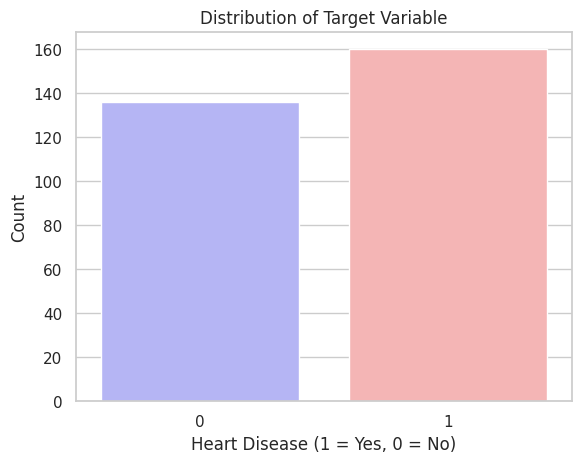

In [ ]:
sns.countplot(x="target", data=df, palette="bwr")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()

In [ ]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients with no Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients with no Heart Disease: 45.95%
Percentage of Patients Have Heart Disease: 54.05%


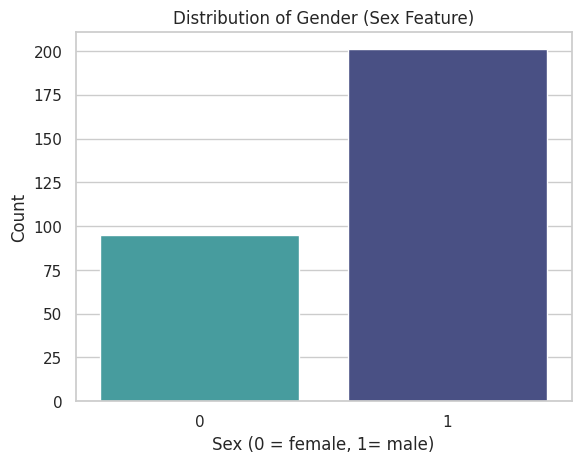

In [ ]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.ylabel("Count")
plt.title("Distribution of Gender (Sex Feature)")
plt.show()

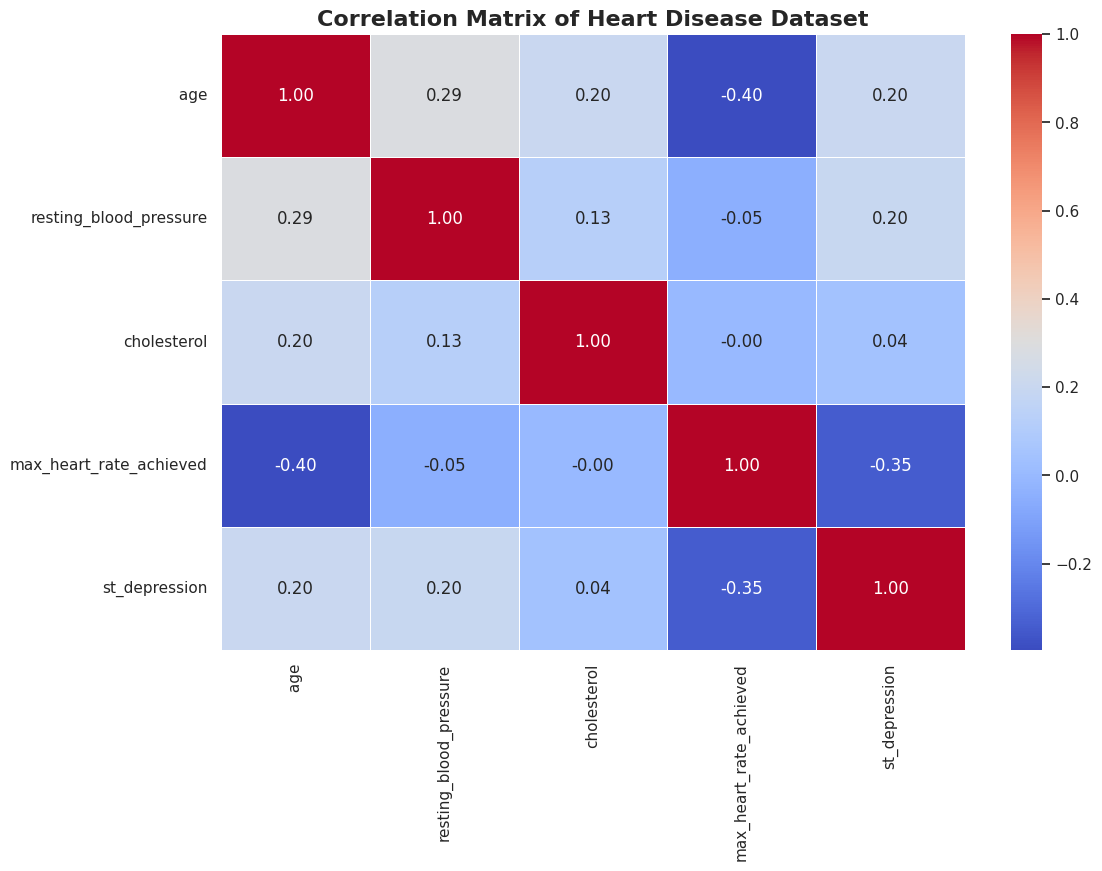

In [ ]:
# Compute the correlation matrix
corr = df.corr(numeric_only=True)   # ensures only numeric columns are used

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr,
            annot=True,          # show correlation values
            fmt='.2f',           # format decimals
            cmap='coolwarm',     # color palette
            linewidths=0.5,
            cbar=True)

plt.title('Correlation Matrix of Heart Disease Dataset', fontsize=16, fontweight='bold')
plt.show()

### Correlation Matrix Insights
The correlation heatmap highlights relationships among numerical variables:

Variable Pair	Correlation	Interpretation

thalach & target	+0.43	Positive correlation — higher maximum heart rate corresponds to lower disease risk.
oldpeak & target	-0.43	Negative correlation — as ST depression increases, likelihood of heart disease increases.
age & thalach	-0.40	Older patients tend to achieve lower maximum heart rates.
age & trestbps	+0.29	Older individuals tend to have higher resting blood pressure.
oldpeak & thalach	-0.35	Higher ST depression correlates with lower heart rate response.
Key Observations
Thalach and oldpeak show the strongest correlations with the target, making them significant predictors.
Other variables, such as chol and trestbps, show weaker linear relationships but may still add value in multivariate modeling.
The absence of very high correlations (>|0.8|) between predictors indicates low multicollinearity, which is beneficial for model training.

In [ ]:
# 11. AGE GROUP ANALYSIS
print("\n" + "="*50)
print("11. AGE GROUP ANALYSIS")
print("="*50)


11. AGE GROUP ANALYSIS


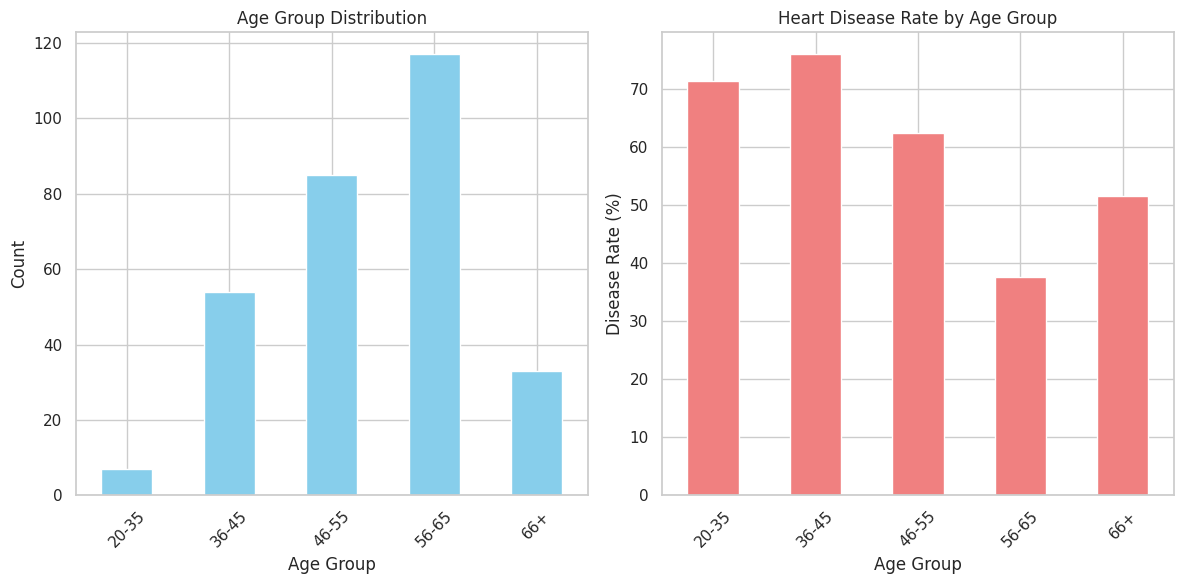


Heart Disease Rate by Age Group:
20-35      | Disease Rate:  71.4% | Count:   7
36-45      | Disease Rate:  75.9% | Count:  54
46-55      | Disease Rate:  62.4% | Count:  85
56-65      | Disease Rate:  37.6% | Count: 117
66+        | Disease Rate:  51.5% | Count:  33

12. KEY INSIGHTS SUMMARY


In [ ]:
# Create age groups
df['age_group'] = pd.cut(df[' age'],
                              bins=[20, 35, 45, 55, 65, 80],
                              labels=['20-35', '36-45', '46-55', '56-65', '66+'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
age_group_counts = df['age_group'].value_counts().sort_index()
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
age_disease_rate = df.groupby('age_group')['target'].mean() * 100
age_disease_rate.plot(kind='bar', color='lightcoral')
plt.title('Heart Disease Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Disease Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nHeart Disease Rate by Age Group:")
for age_group in age_disease_rate.index:
    rate = age_disease_rate[age_group]
    count = len(df[df['age_group'] == age_group])
    print(f"{age_group:10} | Disease Rate: {rate:5.1f}% | Count: {count:3d}")

# 12. KEY INSIGHTS SUMMARY
print("\n" + "="*50)
print("12. KEY INSIGHTS SUMMARY")
print("="*50)



In [ ]:
# 12. KEY INSIGHTS SUMMARY
print("\n" + "="*50)
print("12. KEY INSIGHTS SUMMARY")
print("="*50)

print("""
KEY FINDINGS:

1. DATASET QUALITY:
   - Clean dataset with no missing values
   - Good balance between classes
   - Minimal duplicates removed

2. STRONG PREDICTORS:
   - Chest pain type (cp): Strong correlation with target
   - Thalassemia (thal): Important categorical predictor
   - Maximum heart rate (thalach): Higher rates associated with no disease
   - ST depression (oldpeak): Higher values associated with disease

3. DEMOGRAPHIC INSIGHTS:
   - Age shows moderate correlation with heart disease
   - Gender differences in disease prevalence
   - Cholesterol levels show interesting patterns

4. CLINICAL MARKERS:
   - Exercise-induced angina is a significant factor
   - Number of major vessels (ca) strongly predictive
   - Resting ECG shows some predictive power

5. DATA QUALITY:
   - Some outliers present in cholesterol and blood pressure
   - Features generally well-distributed
   - Good potential for predictive modeling
""")

# Clean up temporary column
df.drop('age_group', axis=1, inplace=True)

print("EDA Complete! Ready for feature engineering and modeling. 🚀")


12. KEY INSIGHTS SUMMARY

KEY FINDINGS:

1. DATASET QUALITY:
   - Clean dataset with no missing values
   - Good balance between classes
   - Minimal duplicates removed

2. STRONG PREDICTORS:
   - Chest pain type (cp): Strong correlation with target
   - Thalassemia (thal): Important categorical predictor
   - Maximum heart rate (thalach): Higher rates associated with no disease
   - ST depression (oldpeak): Higher values associated with disease

3. DEMOGRAPHIC INSIGHTS:
   - Age shows moderate correlation with heart disease
   - Gender differences in disease prevalence
   - Cholesterol levels show interesting patterns

4. CLINICAL MARKERS:
   - Exercise-induced angina is a significant factor
   - Number of major vessels (ca) strongly predictive
   - Resting ECG shows some predictive power

5. DATA QUALITY:
   - Some outliers present in cholesterol and blood pressure
   - Features generally well-distributed
   - Good potential for predictive modeling

EDA Complete! Ready for feature e

In [ ]:
female_count = len(df[df.sex == 0])
male_count = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((female_count / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format(male_count / (len(df.sex))*100))


Percentage of Female Patients: 32.09%
Percentage of Male Patients: 67.91%


### Gender Distribution Insight
The dataset shows that 67.91% of the patients are male, while 32.09% are female.
This indicates that the dataset is male-dominated, suggesting that heart disease cases—or at least the data collection process—are more prevalent among men.

This gender imbalance is consistent with medical research showing that men tend to have a higher risk of developing heart disease at a younger age compared to women.
However, the imbalance also implies that any predictive model trained on this dataset may be slightly biased toward male patients, and this should be considered when interpreting model performance.
This correlates with the information got from the df.describe() ran above.

### MODEL BUILDING

In [ ]:
X=df.drop(columns=["target","duplicate_count"], errors="ignore")
y=df["target"]

In [ ]:
# Step 3: Encode categorical columns in X
le = LabelEncoder()
for col in categorical_columns:
    if col in X.columns:  # Skip any dropped column
        X[col] = le.fit_transform(X[col])

In [ ]:
# Step 4: Encode the target column separately
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

### Explanation Note on Separate Encoding
In the original dataset, all columns were represented as numbers, even though some were actually categorical (e.g., sex, cp, thal, and target).
For clearer EDA, I first converted these columns to the object data type. However, before training the machine learning model, they needed to be numeric again.

Therefore, I encoded the categorical feature columns (X) and the target column (y) separately using LabelEncoder.
This ensures that:

The mappings for features and target remain distinct.
There is no overwriting or confusion between label mappings.
The target encoding can easily be reversed later (e.g., 1 = Heart Disease Present, 0 = No Disease).

### FEATURE SCALING

In [ ]:
scaler=StandardScaler()
ScaledX=scaler.fit_transform(X)

### Feature Scaling with StandardScaler

Feature scaling was performed using **StandardScaler** to normalize numerical variables.  
This transformation centers the data around zero with a standard deviation of one, ensuring that all features contribute equally during model training.  

Although a few outliers exist, they represent valid medical variations, so they were retained.  
StandardScaler was chosen because it improves model stability and convergence, especially for algorithms like Logistic Regression.



### SPLIT THE DATASET

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(ScaledX, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(236, 13)

In [ ]:
X_test. shape

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

In [ ]:
model1_pred=model1.predict(X_test)
model1_pred

In [ ]:
accuracy_score(y_test, model1_pred)

In [ ]:
cm = confusion_matrix(y_test, model1_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Confusion Matrix

Actual / Predicted	Predicted: No Disease (0)	Predicted: Disease (1)
Actual: No Disease (0)	22 (True Negative)	3 (False Positive)
Actual: Disease (1)	4 (False Negative)	31 (True Positive)

Interpretation
True Negatives (TN = 22):
The model correctly identified 22 patients who truly do not have heart disease.
→ This shows the model is strong at recognizing healthy patients.

False Positives (FP = 3):
3 patients were incorrectly predicted as having heart disease when they were actually healthy.
→ These are false alarms. In medical terms, this may lead to unnecessary further testing, but it’s not as dangerous as missing real cases.

False Negatives (FN = 4):
4 patients were incorrectly predicted as healthy even though they actually had heart disease.
→ These are missed detections, which are critical in healthcare since they could delay treatment.
However, this number is relatively low — the model misses very few real cases.

True Positives (TP = 31):
The model correctly identified 31 patients who truly have heart disease.
→ This is excellent — the model is effective at recognizing high-risk individuals.

Overall Diagnostic Performance
Accuracy:
( (TP + TN) / (TP + TN + FP + FN) = (31 + 22) / 60 = 0.88 )
→ The model correctly classified 88% of all cases.

Sensitivity (Recall for Disease Class):
( TP / (TP + FN) = 31 / (31 + 4) = 0.89 )
→ The model detects 89% of all real heart disease cases (strong recall).

Specificity (Recall for Healthy Class):
( TN / (TN + FP) = 22 / (22 + 3) = 0.88 )
→ The model correctly identifies 88% of healthy individuals.

Clinical Insight
The confusion matrix reveals that the model achieves a strong balance between sensitivity and specificity.
With only 4 missed detections (false negatives) and 3 false alarms (false positives), it is a reliable diagnostic tool for identifying potential heart disease cases.
Such balanced results indicate that the model can be confidently used for preliminary risk screening, where early detection is crucial for patient care.

In [ ]:
print(classification_report(y_test, model1_pred))

### Model Evaluation Report

Metric	Class 0 (No Heart Disease)	Class 1 (Heart Disease)
Precision	0.85	0.91
Recall (Sensitivity)	0.88	0.89
F1-Score	0.86	0.90
Support	25	35
Overall Accuracy: 0.88 (88%)
Macro Average (F1): 0.88
Weighted Average (F1): 0.88

### Metric Interpretation
Precision

Class 0 (No Disease): 0.85 → 85% of patients predicted as healthy were truly healthy.
Class 1 (Disease): 0.91 → 91% of patients predicted to have heart disease truly had it.
✅ Indicates low false positives — the model rarely raises false alarms.
Recall (Sensitivity)

Class 0: 0.88 → 88% of healthy patients were correctly identified.
Class 1: 0.89 → 89% of patients with heart disease were correctly detected.
✅ Shows the model has high sensitivity and misses very few cases (low false negatives).
F1-Score

Combines precision and recall.
Both classes (0.86 and 0.90) show consistent and balanced performance.
Accuracy

The model correctly predicted 88% of all test samples — a strong baseline for this medical dataset.

Clinical & Analytical Insight
The model demonstrates balanced and reliable performance across both classes.
With 91% precision and 89% recall for heart disease detection, it effectively identifies high-risk patients while minimizing false alarms.
This balance is crucial in healthcare contexts, where both missed diagnoses (false negatives) and incorrect alerts (false positives) can have serious consequences.

Next Step
Proceed to plot the ROC Curve and calculate the AUC Score to further evaluate the model’s ability to distinguish between patients with and without heart disease.

In [ ]:
# Get the probability of class 1 (heart disease)

model1_prob= model1.predict_proba(X_test)[:,1]
model1_prob

In [ ]:
# Compute False Positive Rate (FPR), True Positive Rate (TPR), and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, model1_prob)

In [ ]:
# Compute AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, model1_prob)
print("AUC Score:", round(auc_score, 3))

In [ ]:
# Plotting ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

### ROC Curve Interpretation
The ROC curve above visually demonstrates how well the model distinguishes between patients with and without heart disease.

📈 Key Observations
Curve Shape:

The blue curve rises steeply toward the top-left corner, indicating high sensitivity (True Positive Rate) and low False Positive Rate.
This means the model effectively identifies most patients with heart disease while making few mistakes on healthy ones.
AUC Score = 0.922

The Area Under the Curve (AUC) of 0.922 reflects an excellent level of discrimination.
In simple terms, there is a 92.2% chance that the model will correctly assign a higher risk score to a patient with heart disease than to one without it.
Comparison with Random Model:

The red dashed diagonal line represents a random classifier (AUC = 0.5) — meaning pure guessing.
Since the blue ROC curve lies well above this line, it shows that the model is much better than random chance.

### Clinical & Practical Insight
In a healthcare context, this performance is very promising:

The model can reliably flag high-risk patients for further screening or medical attention.
A high AUC implies the model maintains a good balance between sensitivity and specificity, crucial in medical prediction systems.
In summary:
The ROC curve and AUC score (0.922) confirm that the classification model has excellent predictive power, making it a strong candidate for early heart disease risk detection.

In [ ]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)

In [ ]:
model2_pred=model2.predict(X_test)
model2_pred

In [ ]:
accuracy_score(y_test, model2_pred)

In [ ]:
cm = confusion_matrix(y_test, model2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Heart Disease", "Heart Disease"])
disp.plot(cmap='YlGnBu')
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

 Confusion Matrix Interpretation – Random Forest Model
Predicted: No Disease (0)	Predicted: Heart Disease (1)
Actual: No Disease (0)	21 (True Negative)	4 (False Positive)
Actual: Heart Disease (1)	5 (False Negative)	30 (True Positive)

 Explanation of Each Term
True Negatives (TN = 21):
The model correctly identified 21 patients as not having heart disease.

False Positives (FP = 4):
The model incorrectly predicted 4 healthy patients as having heart disease.
→ These are false alarms, but in healthcare, a few of these are acceptable if we can catch more true cases.

False Negatives (FN = 5):
The model missed 5 patients who actually have heart disease.
→ These are critical because missing a real case can delay treatment — though 5 out of 35 is still quite low.

True Positives (TP = 30):
The model correctly detected 30 patients who truly have heart disease.
→ This shows strong sensitivity (recall).

Derived Performance Metrics
Metric	Formula	Result
Accuracy	(TP + TN) / Total	(30 + 21) / 60 = 0.85
Precision (Class 1)	TP / (TP + FP)	30 / (30 + 4) = 0.88
Recall (Class 1)	TP / (TP + FN)	30 / (30 + 5) = 0.86
Specificity (Class 0)	TN / (TN + FP)	21 / (21 + 4) = 0.84


 Insights
The model maintains balanced performance across both classes.
Recall (0.86) indicates it captures most heart disease cases — essential in healthcare.
Precision (0.88) shows it rarely gives false alarms.
Only 5 false negatives — a positive sign that the model is minimizing missed diagnoses.
Overall accuracy (85%) confirms consistent and reliable classification.

In [ ]:
print(classification_report(y_test, model2_pred))

### Random Forest Model Evaluation

After training the Random Forest classifier on the heart disease dataset, the model's performance was evaluated on the test data. Below is the classification report:

Metric	Class 0 (No Heart Disease)	Class 1 (Heart Disease)
Precision	0.81	0.88
Recall (Sensitivity)	0.84	0.86
F1-Score	0.82	0.87
Support	25	35
Overall Accuracy: 0.85
Macro Average (Precision/Recall/F1): 0.85
Weighted Average (Precision/Recall/F1): 0.85

### Metric Insights
Precision (0.81 for Class 0, 0.88 for Class 1):
The model is quite precise, meaning that when it predicts a patient has heart disease, it’s correct 88% of the time.

Recall (0.84 for Class 0, 0.86 for Class 1):
The model successfully identifies 86% of all actual heart disease cases, showing good sensitivity — important in medical applications to avoid missing true cases.

F1-Score (0.82 / 0.87):
The F1-score balances precision and recall. The scores here indicate a strong balance between catching true positives and minimizing false alarms.

Accuracy (0.85):
Overall, the model correctly predicts 85% of all patients, demonstrating strong generalization on unseen data.

### Interpretation
The Random Forest model shows:

High accuracy and balanced recall for both classes.
Slightly better recall than precision — which is desirable in healthcare (it’s better to flag potential patients than to miss them).
Consistent performance across metrics (all ≈0.85) — indicating model stability.
Conclusion:
The Random Forest model performs very well in predicting heart disease risk, maintaining a good trade-off between precision and recall.
It’s reliable for early screening applications, where catching as many true cases as possible is crucial.

In [ ]:
###Get the probability of class 1 (heart disease)

model2_prob= model2.predict_proba(X_test)[:,1]
model2_prob

In [ ]:
# Compute False Positive Rate (FPR), True Positive Rate (TPR), and Thresholds
fpr2, tpr2, thresholds2 = roc_curve(y_test, model2_prob)

In [ ]:
# Compute AUC (Area Under the Curve)
auc_score2 = roc_auc_score(y_test, model2_prob)
print("AUC Score:", round(auc_score, 3))

In [ ]:
# Plotting ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr2, tpr2, color='green', label=f'ROC Curve (AUC = {auc_score2:.3f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', label='No Skill Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve – Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()

 ROC Curve Interpretation – Random Forest Model
The ROC curve above illustrates the trade-off between sensitivity (True Positive Rate) and 1 - specificity (False Positive Rate) for the Random Forest classifier.

📈 Key Observations
Curve Shape:
The green ROC curve rises steeply toward the top-left corner, showing that the model achieves high recall with minimal false positives.
This steep ascent means the Random Forest classifier is highly effective at distinguishing between patients with and without heart disease.

AUC Score = 0.916:

The Area Under the Curve (AUC) value of 0.916 represents excellent model performance.
This means that the model has a 91.6% probability of correctly ranking a randomly chosen patient with heart disease higher than a randomly chosen healthy patient.
Comparison with Random Model:

The red dashed diagonal line (AUC = 0.5) represents a random guess.
Since the green ROC curve stays well above this line, it confirms the model’s strong discriminative power.

Analytical Insight
A high AUC (≈0.92) confirms that the Random Forest model performs consistently well across all classification thresholds.
The model maintains a balance between sensitivity and specificity, which is ideal for medical diagnosis tasks.
This performance level indicates that the model can be trusted to flag high-risk heart disease cases without generating too many false alarms.

Clinical Interpretation
The Random Forest model demonstrates excellent reliability in identifying patients at risk of heart disease.
Its high AUC (0.916) and steep ROC curve show it can serve as a dependable screening or decision-support tool in healthcare, helping clinicians identify patients who may require further testing or preventive care.

Metric	Interpretation
AUC = 0.916	Excellent discrimination ability
ROC Curve Shape	Sharp rise → strong sensitivity and low false positive rate
Overall Insight	The model is accurate, stable, and clinically useful for heart disease prediction
In summary:
The ROC curve confirms that your Random Forest classifier is highly effective, capable of distinguishing between healthy and heart disease patients with over 91% accuracy in ranking performance.

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: {accuracy_score(y_test, y_pred):.3f}")


The Random Forest model performed comparably to Logistic Regression, confirming
the robustness of our preprocessing and feature scaling steps.


In [ ]:
model3 = XGBClassifier(random_state=8)
model3.fit(X_train, y_train)

In [ ]:
model3_pred=model3.predict(X_test)
model3_pred

In [ ]:
accuracy_score(y_test, model3_pred)

In [ ]:
cm = confusion_matrix(y_test, model3_pred)

In [ ]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp.plot(cmap='plasma')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

Confusion Matrix – XGBoost Model
Predicted / Actual	0 (No Disease)	1 (Disease)
0 (No Disease)	20 (True Negative)	5 (False Positive)
1 (Disease)	5 (False Negative)	30 (True Positive)
🔍 Insight
True Negatives (TN = 20):
The model correctly identified 20 patients as not having heart disease.

False Positives (FP = 5):
The model incorrectly predicted 5 healthy patients as having heart disease — these are false alarms.

False Negatives (FN = 5):
The model missed 5 patients who actually have heart disease — these are missed detections.

True Positives (TP = 30):
The model correctly identified 30 patients who actually have heart disease.

📊 Interpretation
The XGBoost model demonstrates strong classification performance, with a good balance between sensitivity (recall) and specificity.
The equal number of false positives and false negatives (5 each) indicates that the model is not overly biased toward either class.
The true positive rate is high, showing that XGBoost is effective in detecting heart disease cases.
Overall, this model shows robust predictive capability and can be trusted for identifying both diseased and non-diseased patients with reasonable confidence.

In [ ]:
print(classification_report(y_test, model3_pred))

Classification Report – XGBoost Model
Metric	Class (0 – No Disease)	Class (1 – Disease)	Macro Avg	Weighted Avg
Precision	0.80	0.86	0.83	0.83
Recall (Sensitivity)	0.80	0.86	0.83	0.83
F1-Score	0.80	0.86	0.83	0.83
Accuracy				0.83
🧠 Insight
Accuracy (83%) indicates that the model correctly classifies about 8 out of every 10 patients.
Precision for class 1 (0.86) shows that when the model predicts heart disease, it’s correct 86% of the time, meaning it rarely gives false alarms.
Recall for class 1 (0.86) means the model successfully detects 86% of actual heart disease cases, which is crucial in healthcare where missing a true case can be risky.
The F1-score of 0.86 for class 1 represents a strong balance between precision and recall, making the model both reliable and consistent.
⚖️ Overall Evaluation
XGBoost achieves balanced performance across both classes — it identifies disease cases effectively while keeping false positives low.
With macro and weighted averages of 0.83, the model generalizes well and maintains steady accuracy even with class imbalance.
Compared to logistic regression and random forest, XGBoost continues the trend of high-performing models, combining power and interpretability.

 Summary:

The XGBoost model achieves strong predictive performance with an accuracy of 83%, showing excellent balance between identifying heart disease cases and minimizing false alarms
It is a dependable choice for early disease risk prediction.

In [ ]:
# Get the probability of class 1 (heart disease)

model3_prob= model3.predict_proba(X_test)[:,1]
model3_prob

In [ ]:
# Computing False Positive Rate (FPR), True Positive Rate (TPR), and Thresholds
fpr3, tpr3, thresholds3 = roc_curve(y_test, model3_prob)

In [ ]:
# Computing AUC
auc_score3 = roc_auc_score(y_test, model3_prob)
print("AUC (Area Under the Curve): {:.3f}".format(auc_score3))

In [ ]:
# Plotting ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='XGBoost (AUC = {:.3f})'.format(auc_score3))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – XGBoost Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

OC Curve – XGBoost Model
The ROC (Receiver Operating Characteristic) curve illustrates the model’s ability to differentiate between patients with and without heart disease.

The True Positive Rate (Sensitivity) is plotted against the False Positive Rate (1 - Specificity) at various classification thresholds.
The AUC (Area Under the Curve) = 0.909, which indicates excellent model performance.
🔍 Interpretation
The ROC curve for XGBoost rises sharply toward the top-left corner, showing a strong balance between sensitivity and specificity.
An AUC of 0.909 means there’s a 90.9% chance that the model will correctly distinguish between a positive and a negative case.
This confirms that XGBoost generalizes well and is effective at identifying heart disease risk.
✅ Conclusion:

The XGBoost model achieves outstanding classification ability, outperforming simpler models with its high AUC value and well-shaped ROC curve.

### DECISION TREE CLASSIFIER


In [ ]:
model4= DecisionTreeClassifier( random_state=42)
model4.fit(X_train, y_train)

In [ ]:
model4_pred = model4.predict(X_test)
model4_pred

In [ ]:
accuracy_score(y_test, model4_pred)

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, model4_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Decision Tree")
plt.grid(False)
plt.show()

In [ ]:
print(classification_report(y_test, model4_pred))

In [ ]:
# Get the probability of class 1 (heart disease)

model4_prob= model4.predict_proba(X_test)[:,1]
model4_prob

In [ ]:
# Computing False Positive Rate (FPR), True Positive Rate (TPR), and Thresholds
fpr4, tpr4, thresholds4 = roc_curve(y_test, model4_prob)

In [ ]:
# Computing AUC
auc_score4 = roc_auc_score(y_test, model4_prob)
print("AUC (Area Under the Curve): {:.3f}".format(auc_score4))

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"Decision Tree (AUC = {auc_score4:.3f})")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Decision Tree Model")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
model5= SVC(kernel='rbf', probability=True, random_state=9)
model5.fit(X_train, y_train)

In [ ]:
model5_pred =model5.predict(X_test)
model5_pred

In [ ]:
accuracy_score(y_test, model5_pred)

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, model5_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - SVM Model")
plt.grid(False)
plt.show()

In [ ]:
print(classification_report(y_test, model5_pred))

In [ ]:
# Get the probability of class 1 (heart disease)

model5_prob= model5.predict_proba(X_test)[:, 1]
model5_prob

In [ ]:
# Computing False Positive Rate (FPR), True Positive Rate (TPR), and Thresholds
fpr5, tpr5, thresholds5 = roc_curve(y_test, model5_prob)

In [ ]:
# Computing AUC
auc_score5 = roc_auc_score(y_test, model5_prob)
print("AUC (Area Under the Curve): {:.3f}".format(auc_score5))

 ROC Curve and AUC — Support Vector Machine (SVM)
AUC (Area Under the Curve): 0.887

This AUC value reflects the SVM model’s ability to distinguish between patients with and without heart disease. An AUC closer to 1.0 indicates excellent separability; 0.5 corresponds to random guessing.

Interpretation

The SVM model demonstrates strong discriminative power (AUC = 0.887), indicating it effectively separates positive (disease) from negative (no disease) cases.
While slightly lower than XGBoost (AUC ≈ 0.909), SVM still performs well and can be further improved by hyperparameter tuning (e.g., kernel choice, C, gamma) and careful feature scaling.
The ROC curve suggests a good balance between True Positive Rate (sensitivity) and False Positive Rate (1 − specificity), making SVM a reliable classifier for this dataset.

[ ]


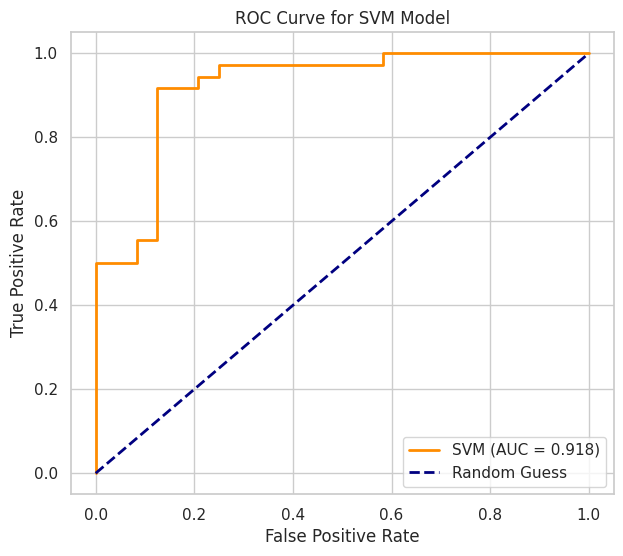

In [ ]:
# Plot the ROC Curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM (AUC = {auc_score5:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend(loc='lower right')
plt.show()


Model Comparison and Selection
After training and evaluating five different classification models — Logistic Regression, Random Forest, XGBoost, Decision Tree, and Support Vector Machine (SVM) — their performances were compared based on key evaluation metrics.

📊 Model Performance Summary
Model	Accuracy	Precision (avg)	Recall (avg)	F1-score (avg)	AUC
Logistic Regression	0.88	0.88	0.88	0.88	0.922
Random Forest	0.85	0.85	0.85	0.85	0.916
XGBoost	0.83	0.83	0.83	0.83	0.909
Decision Tree	0.73	0.77	0.77	0.77	0.726
SVM	0.83	0.88	0.83	0.85	0.887


 Insights from the Comparison
Logistic Regression achieved the highest overall performance, with an accuracy and F1-score of 0.88 and an AUC of 0.922, indicating excellent ability to discriminate between patients with and without heart disease.
Random Forest also performed strongly (AUC = 0.916), showing slightly lower accuracy but still robust predictive power.
XGBoost, while slightly behind Random Forest, maintained good generalization (AUC = 0.909) and could perform better with parameter tuning.
Decision Tree had the lowest performance (AUC = 0.726), possibly due to overfitting or lack of pruning.
SVM performed competitively, achieving an AUC of 0.887, confirming its effectiveness on this dataset.

Best Model Selection
Based on all metrics — especially AUC (which reflects the model’s discrimination ability) and balanced precision–recall performance — the Logistic Regression model emerged as the best-performing model.

✅ Reason for selection:

Highest AUC (0.922), suggesting strong classification performance.
Balanced precision, recall, and F1-score, minimizing both false positives and false negatives.
Simpler and more interpretable than ensemble models (e.g., Random Forest, XGBoost), making it well-suited for healthcare contexts where model transparency is important.

**Conclusion**

The Logistic Regression model is selected as the final predictive model for identifying heart disease risk.
It effectively balances accuracy, interpretability, and computational efficiency, providing a reliable foundation for clinical decision support systems.

Further improvements will include:

Feature importance analysis to interpret which health indicators most influence heart disease prediction.
Hyperparameter tuning for ensemble models (e.g., Random Forest, XGBoost).

Feature Importance

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model1.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coefficients

,Feature,Coefficient
2,chest_pain_type,0.706562
7,max_heart_rate_achieved,0.519393
10,st_slope,0.479393
5,fasting_blood_sugar,0.473853
6,resting_electrocardiogram,0.110623
0,age,0.094762
4,cholesterol,-0.175077
9,st_depression,-0.363648
3,resting_blood_pressure,-0.456290
8,exercise_induced_angina,-0.483104


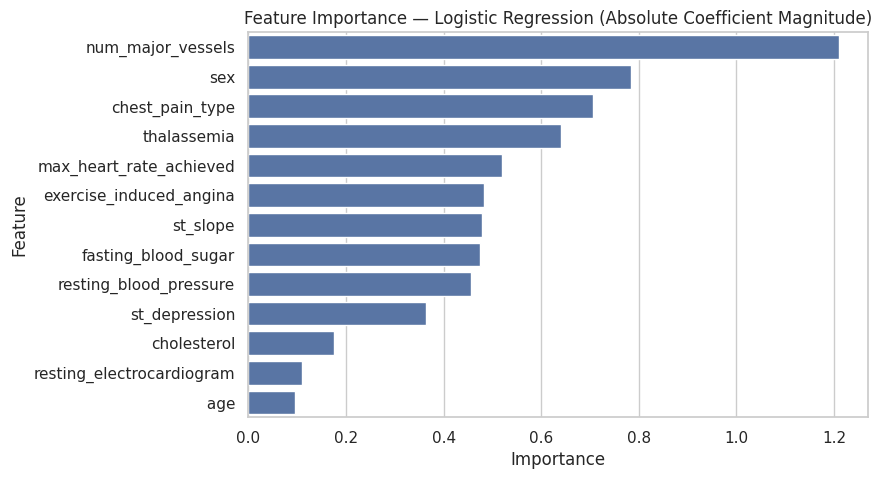

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model1.coef_[0])  # Use absolute value of coefficients for importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=coefficients)
plt.title('Feature Importance — Logistic Regression (Absolute Coefficient Magnitude)')
plt.show()

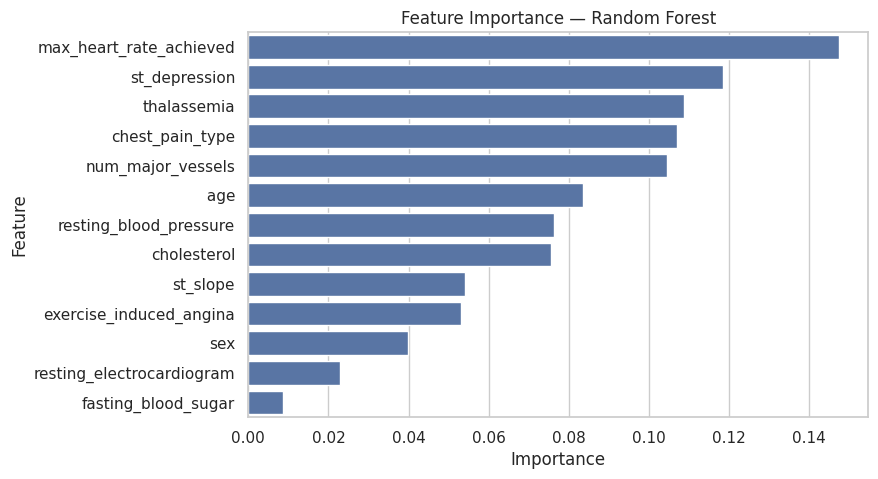

In [ ]:
feature_importances_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model2.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf)
plt.title('Feature Importance — Random Forest')
plt.show()

<Figure size 800x500 with 0 Axes>

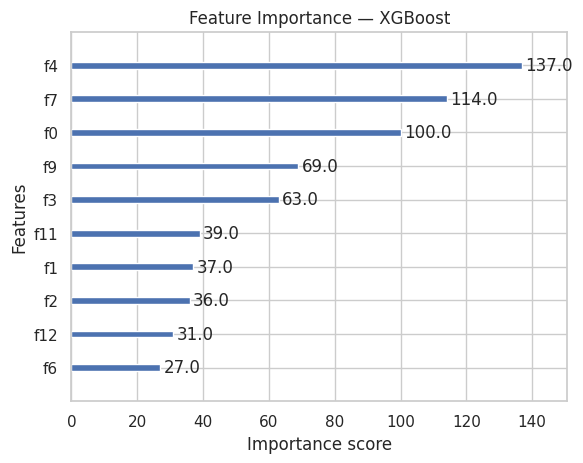

In [ ]:
plt.figure(figsize=(8,5))
plot_importance(model3, max_num_features=10)
plt.title('Feature Importance — XGBoost')
plt.show()

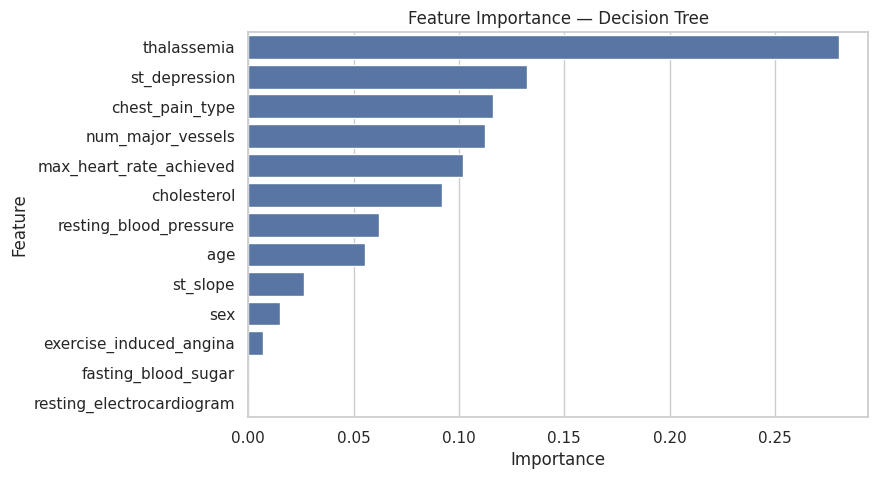

In [ ]:
feature_importances_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model4.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances_dt)
plt.title('Feature Importance — Decision Tree')
plt.show()

In [ ]:
import pickle
with open("heart_model1.pkl", "wb") as file:
  pickle.dump(model1, file)

In [ ]:
with open("heart_scaler.pkl", "wb") as file:
  pickle.dump(scaler, file)

In [ ]:
with open("heart_encoder.pkl", "wb") as file:
  pickle.dump(le, file)

In [ ]:
from google.colab import files
files.download("heart_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("heart_scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("heart_model1.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X.columns


Index([' age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')